## Hypothesis 1 : In Australia, men are more likely to be attacked by a shark while surfing then woman

The first step is to import the libraries that i will need to use in cleaning the dataframe. SRC library is taken from VCS with
different functions 


In [1]:
import pandas as pd
import numpy as np
import src.dataframe_cleaning as cl
import re

In [2]:
"""
Here i import the original CSV,encoded in ISO-8859-1

"""

'\nHere i import the original CSV,encoded in ISO-8859-1\n\n'

In [3]:
df = pd.read_csv("data/attacks.csv", encoding = "ISO-8859-1")

In [4]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now i take the unique values from the columns Country and Activity


In [5]:
#df["Country"].unique()

In [6]:
#df["Activity"].unique()

This gives me the info of the type of data found in each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
#df.Activity == "Surfing"


In [9]:
#df[df.Activity == 'Surfing'].shape[0]

In [10]:
#(df[df['Activity'] == 'Surfing'])

First i count the ammount of times that Australia is found in the column Country

Then i create a new dataframe called df2 only extracting the values of the columns where country is equal to Australia 



In [11]:
df[df.Country == 'Australia'.upper()].shape[0]

1338

In [12]:
#list_columns = ['Country', "Activity"]
#df[list_columns].head()

In [13]:
df2 = df[(df.Country == "AUSTRALIA")]
df2.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,...,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,NaN,NaN
14,2018.05.00,May 2018,2018.0,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,...,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.00,2018.05.00,6289.0,NaN,NaN
16,2018.05.09,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,...,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0,NaN,NaN


Now i drop the columns that will not be needed to be able to prove my hypothese right or wrong


In [14]:
df2.drop(["pdf", "href formula","href","Unnamed: 22","Unnamed: 23","Case Number.1","Case Number.2","original order","Case Number","Name"], axis=1, inplace=True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
#df2.head()


Now i check for NAN´s in my new dataframe with the info from AUS, then i drop these values and create my as final DF called dfaus


In [16]:
df2.isna()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
3,False,False,False,False,False,False,False,False,True,False,False,True,False,False
5,False,False,False,False,False,False,False,False,True,False,False,True,True,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,True,False,False
16,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,False,False,False,False,True,True,False,False,True,False,False,True,False,False
6295,False,False,False,False,True,True,False,False,True,False,False,True,False,False
6296,False,False,False,False,False,False,False,False,True,False,False,True,False,False
6297,False,False,False,False,False,False,False,False,True,False,False,True,True,False


In [17]:
dfaus = df2.dropna()
dfaus

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
10,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018"
21,25-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,M,60,"No injury, knocked off board by shark",N,09h30,3 m shark,"B.Myatt, GSAF"
36,14-Mar-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,Waterman's Bay,Wading,M,10,Minor injuries to legs,N,17h35,Wobbegong shark,"B. Myatt, GSAF"
37,9-Mar-2018,2018.0,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,M,69,"No injury, said to have been charged by sharks...",N,15h30,3.5 m shark,"B. Myatt, GSAF"
38,9-Mar-2018,2018.0,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,M,18,"Minor injury, ankle grazed",N,07h30,1.8 m shark,"B. Myatt, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,26-Jan-1912,1912.0,Unprovoked,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",Swimming,M,21,FATAL,Y,15h00,"2.8 m [9'3""] whaler shark captured 3 days late...","Argus (Melbourne) 1/27, 28, 29, 30/1912; G.P. ..."
5498,26-Mar-1905,1905.0,Unprovoked,AUSTRALIA,New South Wales,Lismore,Bathing,M,40,Righ thigh severely bitten,N,Morning,5' shark,"Adelaide Advertiser, 3/31/1905"
5648,28-Nov-1894,1894.0,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Bathing,M,19,"""Lost his arm""",N,Morning,10' to 12' shark,"Brisbane Courier, 1/7/1895, p.5"
5684,02-Mar-1892,1892.0,Provoked,AUSTRALIA,New South Wales,Lake Macquarie,Fishing,M,21,Lacerations to calf by netted shark PROVOKED I...,N,Night,12' shark,"The Argus, 3/4/1892"


As the Year column is found to be a float which is not necesary, i change it to and integer to be able to work with it better


In [18]:
dfaus["Year"]=dfaus["Year"].astype("int64")

/tmp/ipykernel_1339/2325721477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaus["Year"]=dfaus["Year"].astype("int64")



This is explained in the visualization 



In [19]:
#dfaus.info()

In [20]:
#dff = dfaus[["Year", "Sex"]]
#dff.head()

In [21]:
#dff["year_sex"] = dff["Sex"].groupby(dff["Year"]).transform("count")

In [22]:
#dff

In [23]:
#dff.drop_duplicates( inplace = True)

In [24]:
#dff

In [25]:
#dfaus["year_sex"] = dfaus["Year"].groupby(dfaus["Sex"]).transform("count")

In [26]:
dfaus

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
10,24-May-2018,2018,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018"
21,25-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,M,60,"No injury, knocked off board by shark",N,09h30,3 m shark,"B.Myatt, GSAF"
36,14-Mar-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Waterman's Bay,Wading,M,10,Minor injuries to legs,N,17h35,Wobbegong shark,"B. Myatt, GSAF"
37,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,M,69,"No injury, said to have been charged by sharks...",N,15h30,3.5 m shark,"B. Myatt, GSAF"
38,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,M,18,"Minor injury, ankle grazed",N,07h30,1.8 m shark,"B. Myatt, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,26-Jan-1912,1912,Unprovoked,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",Swimming,M,21,FATAL,Y,15h00,"2.8 m [9'3""] whaler shark captured 3 days late...","Argus (Melbourne) 1/27, 28, 29, 30/1912; G.P. ..."
5498,26-Mar-1905,1905,Unprovoked,AUSTRALIA,New South Wales,Lismore,Bathing,M,40,Righ thigh severely bitten,N,Morning,5' shark,"Adelaide Advertiser, 3/31/1905"
5648,28-Nov-1894,1894,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Bathing,M,19,"""Lost his arm""",N,Morning,10' to 12' shark,"Brisbane Courier, 1/7/1895, p.5"
5684,02-Mar-1892,1892,Provoked,AUSTRALIA,New South Wales,Lake Macquarie,Fishing,M,21,Lacerations to calf by netted shark PROVOKED I...,N,Night,12' shark,"The Argus, 3/4/1892"



Here i count the number of NAN again, but this time in the column Year, to make sure that i have all the values needed

In [27]:
dfaus['Year'].isna().sum()


0

In [28]:
dfaus.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
10,24-May-2018,2018,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018"
21,25-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,M,60,"No injury, knocked off board by shark",N,09h30,3 m shark,"B.Myatt, GSAF"
36,14-Mar-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Waterman's Bay,Wading,M,10,Minor injuries to legs,N,17h35,Wobbegong shark,"B. Myatt, GSAF"
37,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,M,69,"No injury, said to have been charged by sharks...",N,15h30,3.5 m shark,"B. Myatt, GSAF"
38,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,M,18,"Minor injury, ankle grazed",N,07h30,1.8 m shark,"B. Myatt, GSAF"



Now i create a function to be able to clean the whitspaces found in some of the column names, so that confusion is minimum.



This is the original function created, which was then exported to VCS to be able to apply it when needed


col = dfaus.columns

col=[i.rstrip() for i in col]

dfaus.columns = col

In [29]:
dfaus

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
10,24-May-2018,2018,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018"
21,25-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,M,60,"No injury, knocked off board by shark",N,09h30,3 m shark,"B.Myatt, GSAF"
36,14-Mar-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Waterman's Bay,Wading,M,10,Minor injuries to legs,N,17h35,Wobbegong shark,"B. Myatt, GSAF"
37,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,M,69,"No injury, said to have been charged by sharks...",N,15h30,3.5 m shark,"B. Myatt, GSAF"
38,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,M,18,"Minor injury, ankle grazed",N,07h30,1.8 m shark,"B. Myatt, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,26-Jan-1912,1912,Unprovoked,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",Swimming,M,21,FATAL,Y,15h00,"2.8 m [9'3""] whaler shark captured 3 days late...","Argus (Melbourne) 1/27, 28, 29, 30/1912; G.P. ..."
5498,26-Mar-1905,1905,Unprovoked,AUSTRALIA,New South Wales,Lismore,Bathing,M,40,Righ thigh severely bitten,N,Morning,5' shark,"Adelaide Advertiser, 3/31/1905"
5648,28-Nov-1894,1894,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Bathing,M,19,"""Lost his arm""",N,Morning,10' to 12' shark,"Brisbane Courier, 1/7/1895, p.5"
5684,02-Mar-1892,1892,Provoked,AUSTRALIA,New South Wales,Lake Macquarie,Fishing,M,21,Lacerations to calf by netted shark PROVOKED I...,N,Night,12' shark,"The Argus, 3/4/1892"


In [30]:
dfaus.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source'],
      dtype='object')


Here i call a function that replaces whitespaces for blanks


In [31]:
cl.clear_whitspaces_columns(dfaus)

<class 'pandas.core.frame.DataFrame'>


In [32]:
dfaus.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex', 'Age', 'Injury', 'Fatal(Y/N)', 'Time', 'Species',
       'InvestigatororSource'],
      dtype='object')

Here i assign a variable to count the number of males and females in dfaus and show the count



In [33]:
dfaus_M_F_count = dfaus["Sex"].value_counts()


In [34]:
dfaus_M_F_count

M    277
F     30
Name: Sex, dtype: int64

In [35]:
dfaus["Activity"].unique()

array(['Feeding sharks', 'Surfing', 'Wading', 'Swimming', 'Walking',
       'Kayaking / Fishing', 'Body boarding', 'Scuba Diving',
       'Surf fishing', 'Fishing', 'Diving', 'Spearfishing', 'Surf-skiing',
       'Scallop diving on hookah', 'Body boarding ', 'Surf skiing ',
       'Rowing', 'Snorkeling', 'Diving for Abalone', 'Paddle boarding',
       'Bodyboarding', 'Scuba diving', 'Diving, feeding sharks',
       'Washing sand off a speared fish', 'Wakeboarding',
       'Diving for abalone', 'Kayaking',
       'Diving, but on the surface when bitten by the shark',
       "Accidentally stood on hooked shark's tail before attempting to gut it ",
       'Swimming / jumping off a jetty',
       'Scurfing (surfboard being  towed behind a boat)',
       'Scallop diving (using surface-supplied air & a POD) ',
       'Windsurfing', 'Free diving for abalone',
       'Scuba diving (submerged riding a scooter)',
       'Swimming breast stoke', 'Dived naked into the water on a bet',
       'Play

Here i have created a function to make the Activity column clearer when reading, grouping all the activities in a way that makes the data more readable as well as usable

In [36]:

dfaus["Activity"] = dfaus["Activity"].apply(cl.limpiar)
    
    

/tmp/ipykernel_1339/1457477512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaus["Activity"] = dfaus["Activity"].apply(cl.limpiar)


In [37]:
dfaus["Activity"].unique()

array(['unknown', 'surfing', 'swimming', 'standing', 'fishing', 'diving',
       'boating'], dtype=object)

In [38]:
dfaus.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource
10,24-May-2018,2018,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,unknown,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018"
21,25-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",surfing,M,60,"No injury, knocked off board by shark",N,09h30,3 m shark,"B.Myatt, GSAF"
36,14-Mar-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Waterman's Bay,unknown,M,10,Minor injuries to legs,N,17h35,Wobbegong shark,"B. Myatt, GSAF"
37,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,swimming,M,69,"No injury, said to have been charged by sharks...",N,15h30,3.5 m shark,"B. Myatt, GSAF"
38,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,surfing,M,18,"Minor injury, ankle grazed",N,07h30,1.8 m shark,"B. Myatt, GSAF"


A very similar process has been done here, clearing up and grouping the species column to make it more readble and usuable when analysing the data.

In [39]:
#dfaus["Species"].unique()

In [40]:
dfaus["Species"] = dfaus["Species"].apply(cl.clean_species)

/tmp/ipykernel_1339/3681032640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaus["Species"] = dfaus["Species"].apply(cl.clean_species)


In [41]:
dfaus["Species"].unique()


array(['reef', 'other', 'wobbegong', 'white', 'bull', 'blacktip',
       'bronze whale', 'tiger', 'grey nurse', 'mako'], dtype=object)

Export of DF to CSV


In [42]:
dfaus.to_csv(r'M_W_in_Aus.csv')

## Hypothesis 2: In the USA, the attacks are usually unprovoked by humans

In [43]:
#df.Type.unique()

In [44]:
#df[df.Country == 'USA'.upper()].shape[0]

In [45]:
#df[df.Type == 3"Unprovoked"].shape[0]

New DF created where USA is the country 


In [46]:
df1us = df[(df.Country == "USA")]
df1us


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,ND.0056,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,...,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",ND-0056-HortonChase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0056,ND.0056,54.0,NaN,NaN
6283,ND.0019,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,...,NaN,"T. Helm, p.219",ND-0019-Kelley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0019,ND.0019,20.0,NaN,NaN
6288,ND.0014,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,...,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",ND-0014-pre1916-NorthCarolina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0014,ND.0014,15.0,NaN,NaN
6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,...,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0,NaN,NaN



Dropping of uneccesary columns



In [47]:
df1us.drop(["pdf", "href formula","href","Unnamed: 22","Unnamed: 23","Case Number.1","Case Number.2","original order","Case Number","Name", "Investigator or Source"], axis=1, inplace=True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
df1us


,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,M,NaN,Abrasions & bruises hip to ankle,N,NaN,NaN
6283,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,M,NaN,2-inch lacerations,N,NaN,NaN
6288,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,M,NaN,"""Lost leg""",N,NaN,NaN
6292,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,F,NaN,Ankle bitten,N,NaN,NaN



Check for NAN´s


In [49]:
df1us.isna()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,False,False,False,False,False,False,False,False,True,False,False,True,True
6283,False,False,False,False,False,False,False,False,True,False,False,True,True
6288,False,False,False,False,False,False,False,False,True,False,False,True,True
6292,False,False,False,False,False,False,True,False,True,False,False,True,True


In [50]:
df1us = df1us[df1us['Type'].notna()]
df1us.isna()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,False,False,False,False,False,False,False,False,True,False,False,True,True
6283,False,False,False,False,False,False,False,False,True,False,False,True,True
6288,False,False,False,False,False,False,False,False,True,False,False,True,True
6292,False,False,False,False,False,False,True,False,True,False,False,True,True



Count the types of shark attacks that there has been


In [51]:
df1us["Type"].value_counts()

Unprovoked      1721
Provoked         208
Invalid          193
Boating           52
Sea Disaster      32
Boat              23
Name: Type, dtype: int64


Check for NAN´s in the Fatal(Y/N) column



In [52]:
df1us['Fatal (Y/N)'].isna().sum()

188


Here i replace them for unknown´s to be able to work with the values

In [53]:
df1us['Fatal (Y/N)'].fillna("Unknown", inplace=True)

In [54]:
df1us['Fatal (Y/N)'].isna().sum()

0


Export to CSV


In [55]:
df1us.to_csv(r'unprovoked.csv')

## Hypothesis 3: Hawaii is the area in the US where most shark attacks occur

In [56]:
df1us

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,M,NaN,Abrasions & bruises hip to ankle,N,NaN,NaN
6283,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,M,NaN,2-inch lacerations,N,NaN,NaN
6288,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,M,NaN,"""Lost leg""",N,NaN,NaN
6292,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,F,NaN,Ankle bitten,N,NaN,NaN


In [57]:
#df1us.info()

In [58]:
df1us["Area"].unique()

array(['California', 'Georgia', 'Hawaii', 'Florida', 'South Carolina',
       'New York', 'Texas', 'Massachusetts', 'New Jersey', 'Washington',
       'Oregon', 'Alabama', 'North Carolina', 'Maryland', 'Louisiana',
       'Delaware', 'Palmyra Atoll', 'Puerto Rico', 'Maine', 'Virginia',
       'US Virgin Islands', 'Kentucky', 'Guam', 'New Mexico',
       'South Carolina ', 'Johnston Atoll', 'Alaska', 'Missouri',
       'Mississippi', 'North Carolina ', 'Rhode Island',
       'North & South Carolina', 'Florida ', nan, 'Connecticut',
       'Pennsylvania', 'Illinois', 'Wake Island', ' North Carolina',
       'Midway Atoll', 'East coast', ' New Jersey', 'New York ', 'CUBA'],
      dtype=object)

In [59]:
df1us["Area"].value_counts()

Florida                   1037
Hawaii                     298
California                 290
South Carolina             159
North Carolina             101
Texas                       73
New Jersey                  52
New York                    30
Oregon                      29
Virginia                    19
Massachusetts               16
Puerto Rico                 16
Alabama                     15
Georgia                     14
Louisiana                   11
Maryland                     7
Delaware                     7
Rhode Island                 7
Connecticut                  6
Mississippi                  5
US Virgin Islands            5
New York                     3
North Carolina               2
Palmyra Atoll                2
East coast                   2
Washington                   2
Midway Atoll                 1
 North Carolina              1
Wake Island                  1
Illinois                     1
 New Jersey                  1
Pennsylvania                 1
Kentucky

In [60]:
df1us.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"


In [61]:
df2us= df1us.sort_values(by=['Area'])
df2us

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
5749,Mid-Aug-1886,1886.0,Boating,USA,New Jersey,"Shrewsbury River, Highlands, Monmouth County",NaN,M,NaN,"Shark attacked boat, shark killed & towed to s...",N,NaN,Shark was said to have a very rough ½-thick ...
4620,06-Aug-1945,1945.0,Unprovoked,USA,North Carolina,Ocracoke,NaN,NaN,NaN,FATAL,Y,NaN,NaN
1834,17-Aug-2002,2002.0,Unprovoked,USA,Alabama,"Gulf of Mexico, 65 miles offshore from Mobile",Swimming,F,29,Both arms & leg bitten,N,17h00,NaN
2051,09-Jun-2000,2000.0,Unprovoked,USA,Alabama,"Gulf Shores, Baldwin County",Swimming,M,44,Right forearm severed surgically amputated abo...,N,06h45,Bull shark
5811,13-Jun-1881,1881.0,Unprovoked,USA,Alabama,Mobile Bay,Fell overboard,M,23,FATAL,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,12-Apr-1989,1989.0,Unprovoked,USA,Washington,"Pacific Beach, Grays Harbor County",Surfing (lying prone on his board),M,NaN,Forearm bitten,N,10h45,White shark
3496,14-Dec-1967,1967.0,Provoked,USA,NaN,NaN,NaN,M,NaN,"Head, shoulder, arm lacerated. Recorded as PRO...",N,NaN,NaN
5514,1904,1904.0,Invalid,USA,NaN,NaN,Diving on a wreck,M,NaN,Leg bitten,Unknown,NaN,Questionable
6125,Aug-24-1806,1896.0,Sea Disaster,USA,NaN,NaN,NaN,M,NaN,Shark scavenged on the dead sailors,Unknown,NaN,NaN



check for NAN´s and replace them with unknowns



In [62]:
df2us['Area'].isna().sum()

4

In [63]:
df2us['Area'].fillna("Unknown", inplace=True)


Here i create a condition for the visualization of the graph, as there are many Areas with values, i have only chosen the areas
with values over 7

This is done by creating a new column that i named "nueva", if the condition(Area < 7) is not fulfilled, which are the values under
7, then they are appended to "others", is it is fulfilled they are appended to "nueva". I have also rotated the X labels 45 degrees
to make them more readable


In [64]:
condicion = (df2us.Area.value_counts() > 7)
df2us["nueva"] = df2us.Area.apply(lambda x: "Others" if condicion.loc[x] == False else x)

In [65]:
df2us

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,nueva
5749,Mid-Aug-1886,1886.0,Boating,USA,New Jersey,"Shrewsbury River, Highlands, Monmouth County",NaN,M,NaN,"Shark attacked boat, shark killed & towed to s...",N,NaN,Shark was said to have a very rough ½-thick ...,Others
4620,06-Aug-1945,1945.0,Unprovoked,USA,North Carolina,Ocracoke,NaN,NaN,NaN,FATAL,Y,NaN,NaN,Others
1834,17-Aug-2002,2002.0,Unprovoked,USA,Alabama,"Gulf of Mexico, 65 miles offshore from Mobile",Swimming,F,29,Both arms & leg bitten,N,17h00,NaN,Alabama
2051,09-Jun-2000,2000.0,Unprovoked,USA,Alabama,"Gulf Shores, Baldwin County",Swimming,M,44,Right forearm severed surgically amputated abo...,N,06h45,Bull shark,Alabama
5811,13-Jun-1881,1881.0,Unprovoked,USA,Alabama,Mobile Bay,Fell overboard,M,23,FATAL,Y,NaN,NaN,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,12-Apr-1989,1989.0,Unprovoked,USA,Washington,"Pacific Beach, Grays Harbor County",Surfing (lying prone on his board),M,NaN,Forearm bitten,N,10h45,White shark,Others
3496,14-Dec-1967,1967.0,Provoked,USA,Unknown,NaN,NaN,M,NaN,"Head, shoulder, arm lacerated. Recorded as PRO...",N,NaN,NaN,Others
5514,1904,1904.0,Invalid,USA,Unknown,NaN,Diving on a wreck,M,NaN,Leg bitten,Unknown,NaN,Questionable,Others
6125,Aug-24-1806,1896.0,Sea Disaster,USA,Unknown,NaN,NaN,M,NaN,Shark scavenged on the dead sailors,Unknown,NaN,NaN,Others


[Text(0, 0, 'Others'),
 Text(1, 0, 'Alabama'),
 Text(2, 0, 'California'),
 Text(3, 0, 'Florida'),
 Text(4, 0, 'Georgia'),
 Text(5, 0, 'Hawaii'),
 Text(6, 0, 'Louisiana'),
 Text(7, 0, 'Massachusetts'),
 Text(8, 0, 'New Jersey'),
 Text(9, 0, 'New York'),
 Text(10, 0, 'North Carolina'),
 Text(11, 0, 'Oregon'),
 Text(12, 0, 'Puerto Rico'),
 Text(13, 0, 'South Carolina'),
 Text(14, 0, 'Texas'),
 Text(15, 0, 'Virginia')]

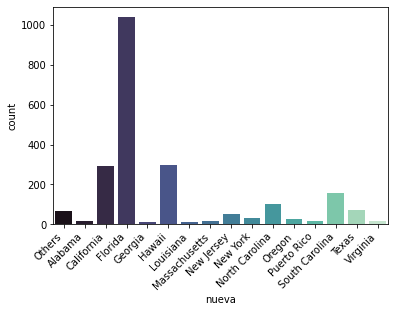

In [66]:
import seaborn as sns
chart = sns.countplot(x=df2us.nueva,palette="mako")
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')

In [67]:
df2us.to_csv(r'hawaii.csv')